In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

In [185]:
#file_path: The path to the CSV file containing the full dataset.

#output_dir: The directory where the monthly split files will be saved.
def split_data_by_month(file_path, output_dir):
    df = pd.read_csv(file_path, parse_dates=['DATE'])
    df['Month'] = df['DATE'].dt.month # Adds a new column Month to the DataFrame
    
    os.makedirs(output_dir, exist_ok=True)
    
    for month in range(1, 13):
        month_df = df[df['Month'] == month] #include only rows where the Month column matches the current month
        if not month_df.empty:# if there is data for that month
            output_file = os.path.join(output_dir, f"{os.path.basename(file_path).split('.')[0]}_Month_{month}.csv")
            month_df.to_csv(output_file, index=False)
            print(f"Saved: {output_file}") #a confirmation message showing the path of the saved file

# Where testing and training files are located
train_file = "X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/ExpandVariables2000to2023.csv"
test_file = "X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/ExpandVariables2024.csv"

# Output directories for testing and training files
train_output_dir = "X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/ExpandVariables_Train"
test_output_dir = "X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/ExpandVariables_Test"

# split and save monthly CSVs.
split_data_by_month(train_file, train_output_dir)
split_data_by_month(test_file, test_output_dir)


Saved: X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/ExpandVariables_Train\ExpandVariables2000to2023_Month_1.csv
Saved: X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/ExpandVariables_Train\ExpandVariables2000to2023_Month_2.csv
Saved: X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/ExpandVariables_Train\ExpandVariables2000to2023_Month_3.csv
Saved: X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/ExpandVariables_Train\ExpandVariables2000to2023_Month_4.csv
Saved: X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/ExpandVariables_Train\ExpandVariables2000to2023_Month_5.csv
Saved: X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/ExpandVariables_Train\ExpandVariables2000to2023_Month_6.csv
Saved: X:/studentresearch/precipitation_nganga/graduateprogram/Spring2

In [186]:
#Function to load each month's csv file into a df


# this is the directory where monthly files are stored
train_dir = "X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/ExpandVariables_Train"

# this dictionary stores dfs for each month
monthly_dfs = {}

# each month's csv file is loaded into a df
for month in range(1, 13):
    file_path = f"{train_dir}/ExpandVariables2000to2023_Month_{month}.csv"
    monthly_dfs[month] = pd.read_csv(file_path)

# show the first few rows of march data
print(monthly_dfs[3].head())

       STATION        DATE  ADPT  ASLP  ASTP  AWBT   AWND  RHAV  SNWD  TAVG  \
0  USW00013880  2000-03-01   NaN   NaN   NaN   NaN   8.50   NaN   0.0  61.0   
1  USW00013880  2000-03-02   NaN   NaN   NaN   NaN   8.28   NaN   0.0  62.0   
2  USW00013880  2000-03-03   NaN   NaN   NaN   NaN   6.49   NaN   0.0  55.0   
3  USW00013880  2000-03-04   NaN   NaN   NaN   NaN  10.29   NaN   0.0  61.0   
4  USW00013880  2000-03-05   NaN   NaN   NaN   NaN   5.14   NaN   0.0  57.0   

    WDF2  WT02  WT05  WT18  Month  
0  230.0   NaN   NaN   NaN      3  
1  330.0   NaN   NaN   NaN      3  
2  160.0   NaN   NaN   NaN      3  
3  280.0   NaN   NaN   NaN      3  
4  170.0   NaN   NaN   NaN      3  


In [187]:
# this is the directory where monthly test files are stored
test_dir = "X:/studentresearch/precipitation_nganga/graduateprogram/Spring2024CourseItems/ML/MLData/ExpandVariables_Test"

# this dictionary stores testv dfs for each month
mtest_dfs = {}

# Load each month's CSV file into a DataFrame
for month in range(1, 13):
    file_path1 = f"{test_dir}/ExpandVariables2024_Month_{month}.csv"
    mtest_dfs[month] = pd.read_csv(file_path1)

# show the first few rows of december test data
print(mtest_dfs[12].head())

       STATION        DATE  ADPT  ASLP  ASTP  AWBT   AWND  RHAV  SNWD  TAVG  \
0  USW00013880  2024-12-01   NaN   NaN   NaN   NaN   2.01   NaN   0.0   NaN   
1  USW00013880  2024-12-02   NaN   NaN   NaN   NaN   4.70   NaN   0.0   NaN   
2  USW00013880  2024-12-03   NaN   NaN   NaN   NaN   8.50   NaN   0.0   NaN   
3  USW00013880  2024-12-04   NaN   NaN   NaN   NaN   4.70   NaN   0.0   NaN   
4  USW00013880  2024-12-05   NaN   NaN   NaN   NaN  12.08   NaN   0.0   NaN   

    WDF2  WT02  WT05  WT18  Month  
0  280.0   NaN   NaN   NaN     12  
1   30.0   NaN   NaN   NaN     12  
2  350.0   NaN   NaN   NaN     12  
3  190.0   NaN   NaN   NaN     12  
4  260.0   NaN   NaN   NaN     12  


In [188]:


# Display the percentage of missing values for each month

def check_missing_values(monthly_dfs):
    missing_values = {}
    

    for month, df in monthly_dfs.items():
        missing_percentage = df.isnull().sum() / len(df) * 100
        
        
        missing_values[month] = missing_percentage
    
    return pd.DataFrame(missing_values)


missing_df = check_missing_values(monthly_dfs)
print(missing_df)# prints for all months 
print(missing_df[1])# just january

                1          2          3          4          5          6   \
STATION   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
DATE      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
ADPT     28.779176  32.461435  27.920332  27.854977  27.956463  27.853535   
ASLP     28.999145  32.582160  27.956989  27.892875  28.078757  27.979798   
ASTP     28.999145  32.582160  27.956989  27.892875  28.078757  27.979798   
AWBT     28.779176  32.461435  27.920332  27.854977  27.956463  27.853535   
AWND      2.444091   2.709591   2.712610   2.539161   2.421426   2.348485   
RHAV     27.324942  32.045607  27.639296  27.627590  27.393910  27.436869   
SNWD     43.150434  43.152247  43.255132  43.153108  45.407851  45.454545   
TAVG     52.022486  51.549296  51.967253  49.646286  49.749297  49.684343   
WDF2      2.456312   2.682763   2.651515   2.551794   2.323591   2.323232   
WT02     89.013809  90.731053  93.365103  93.797372  94.398924  95.505051   

In [189]:


# TEST DATA: Display the percentage of missing values for each month


def tcheck_missing_values(mtest_dfs):
    tmissing_values = {}
    
    for tmonth, tdf in mtest_dfs.items():
        tmissing_percentage = tdf.isnull().sum() / len(tdf) * 100

        tmissing_values[tmonth] = tmissing_percentage
    
    return pd.DataFrame(tmissing_values)


tmissing_df = tcheck_missing_values(mtest_dfs)
print(tmissing_df)# prints for all months 
print(tmissing_df[1])# just january

                 1           2           3           4           5   \
STATION    0.000000    0.000000    0.000000    0.000000    0.000000   
DATE       0.000000    0.000000    0.000000    0.000000    0.000000   
ADPT       0.879765    0.626959    0.586510   10.606061    0.586510   
ASLP       0.879765    0.626959    0.586510   10.909091    0.586510   
ASTP       0.879765    0.626959    0.586510   10.909091    0.586510   
AWBT       0.879765    0.626959    0.586510   10.606061    0.586510   
AWND       0.000000    0.626959    0.000000    8.787879    0.000000   
RHAV       0.000000    0.626959    0.586510    8.787879    0.293255   
SNWD      45.454545   45.141066   45.454545   45.454545   45.454545   
TAVG      45.454545   45.454545   45.454545   45.454545   45.454545   
WDF2       0.000000    0.000000    0.000000    8.787879    0.000000   
WT02      92.082111   96.865204   89.736070   95.454545   88.563050   
WT05     100.000000   99.686520  100.000000  100.000000   99.706745   
WT18  

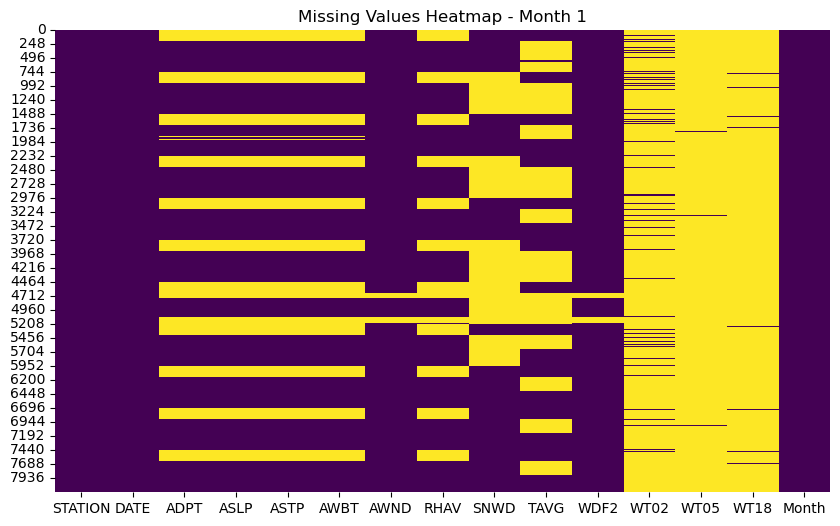

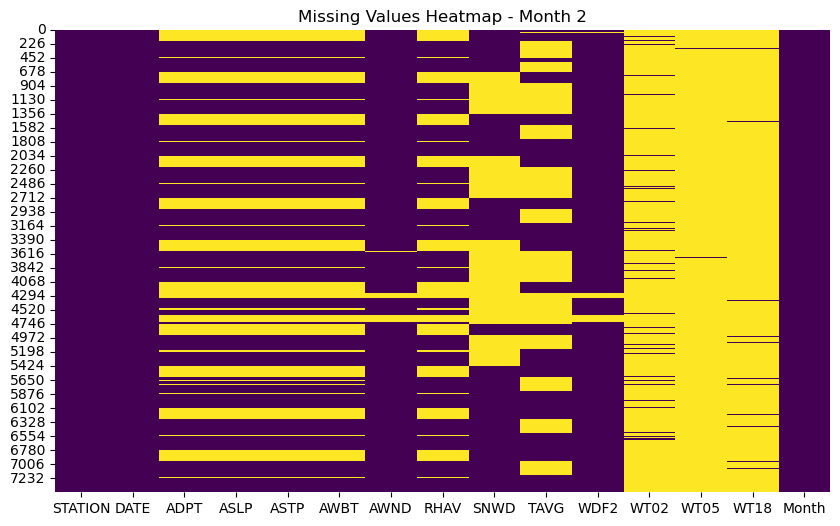

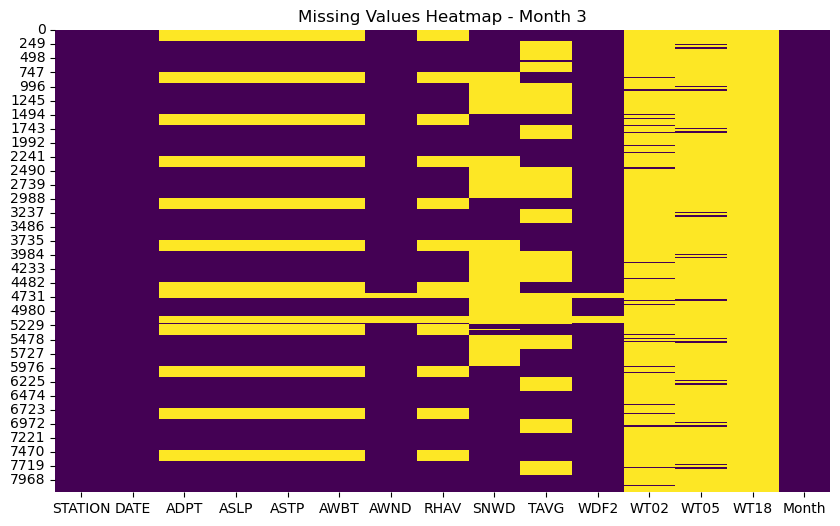

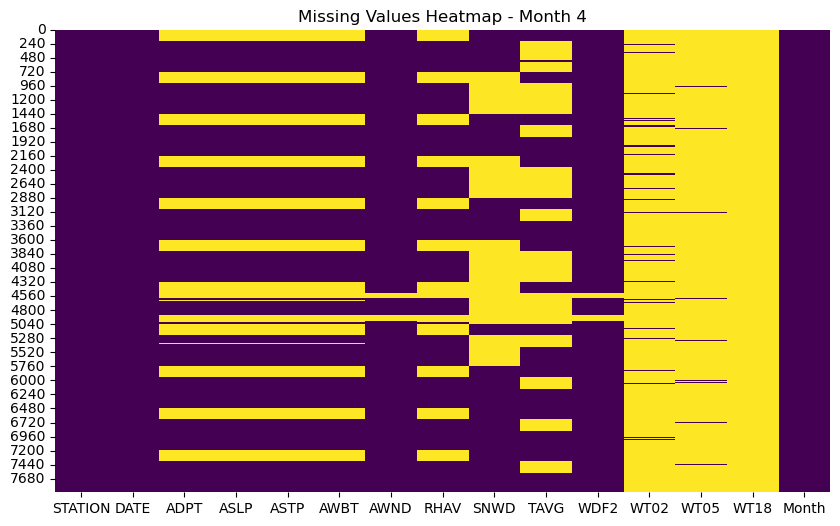

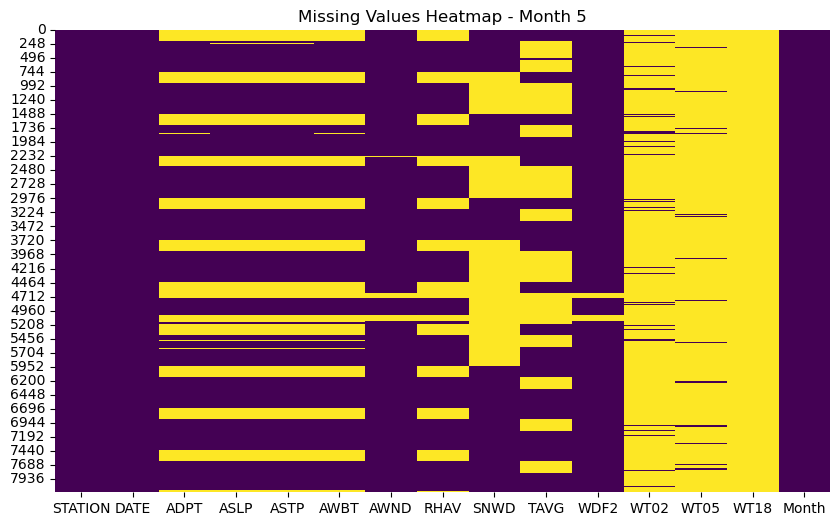

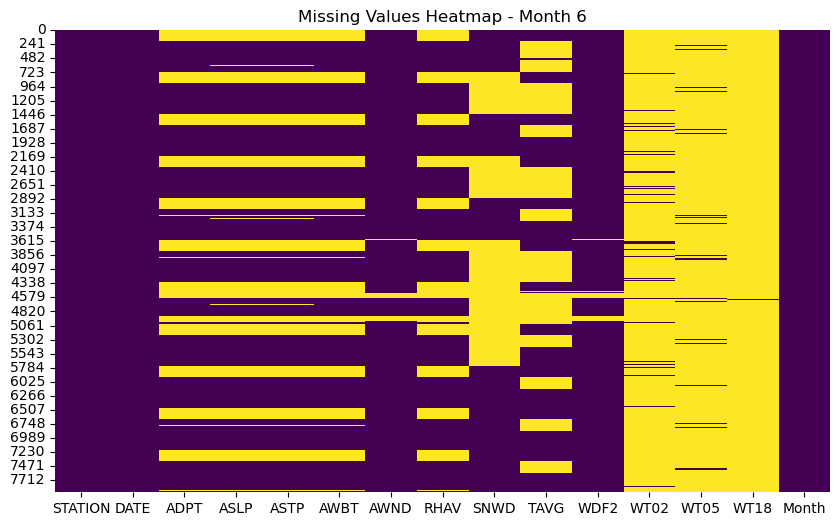

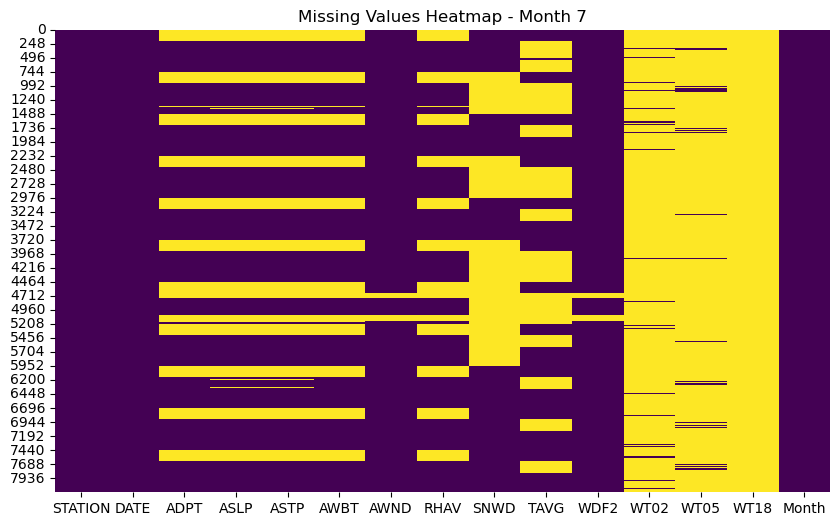

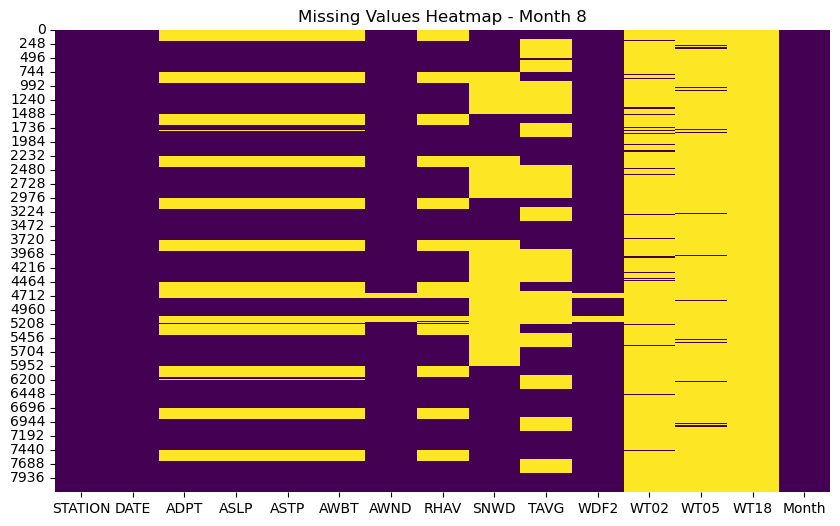

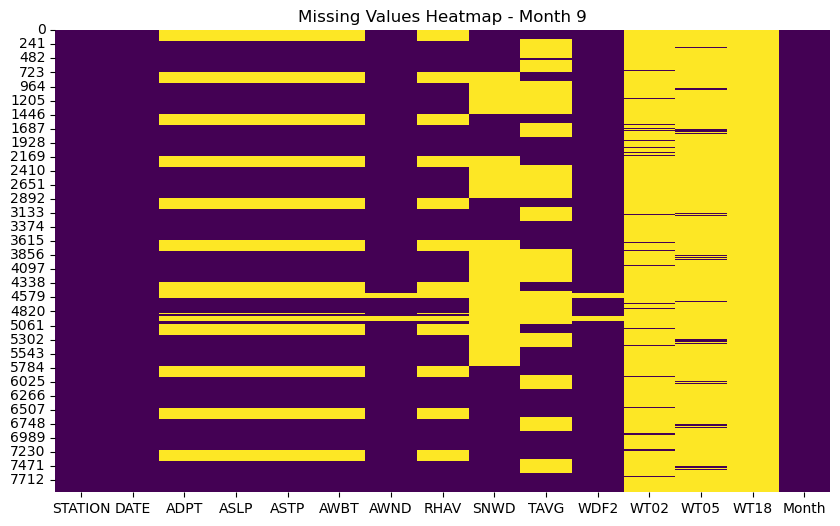

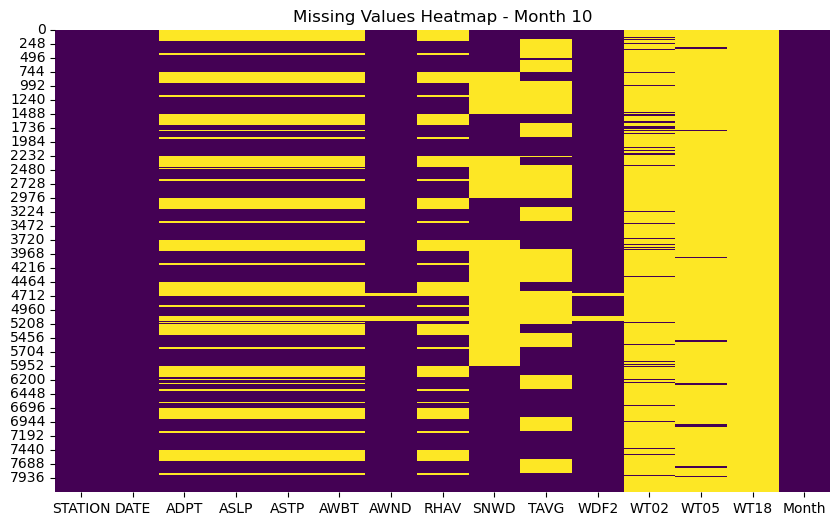

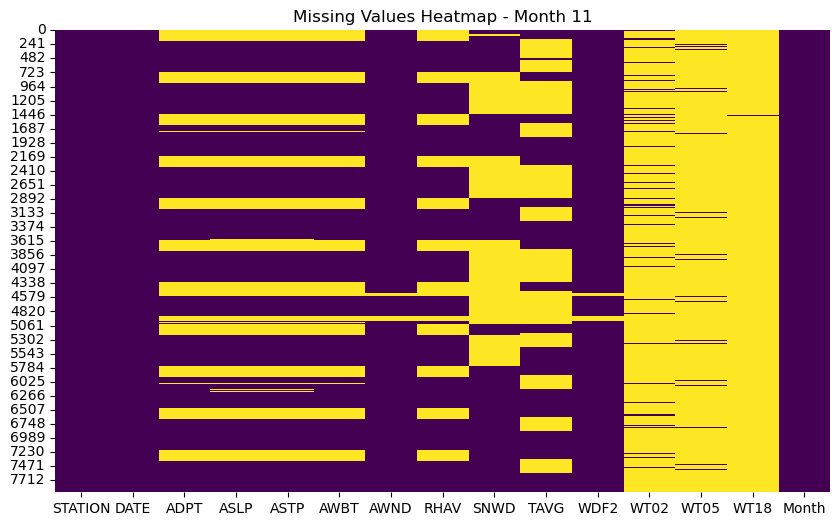

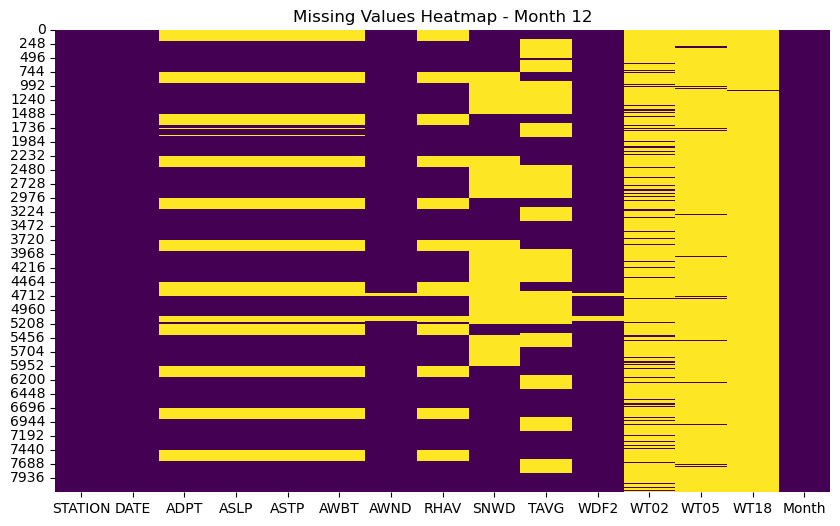

In [190]:
# create heat maps to show the percentage of missing values for each month for training data

def plot_missing_values_heatmap(df, month):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title(f"Missing Values Heatmap - Month {month}")
    plt.show()

for month, df in monthly_dfs.items():# monthly_dfs is a dictionary
    plot_missing_values_heatmap(df, month)


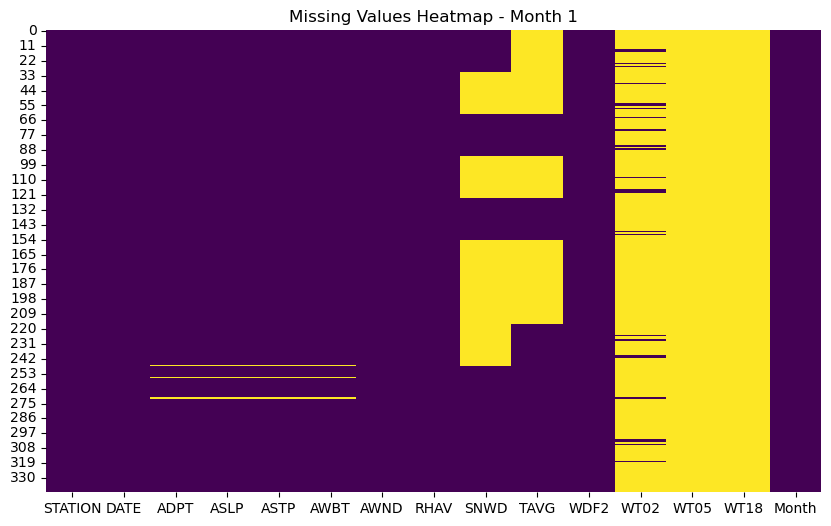

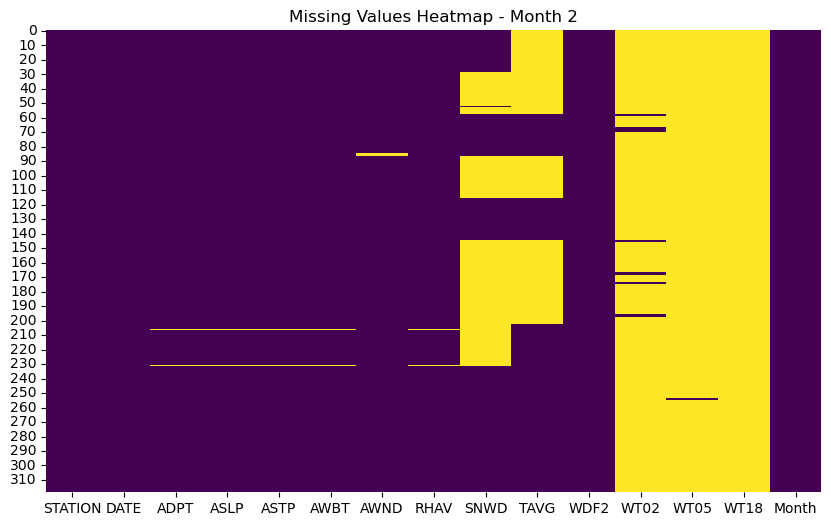

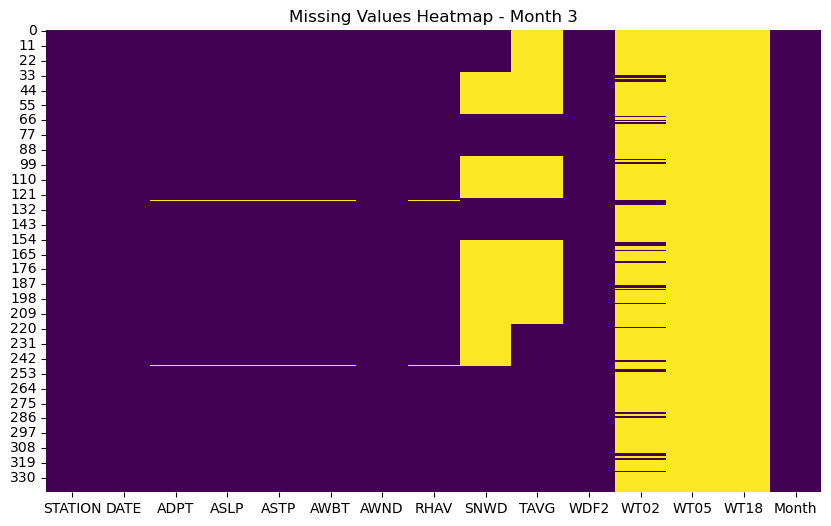

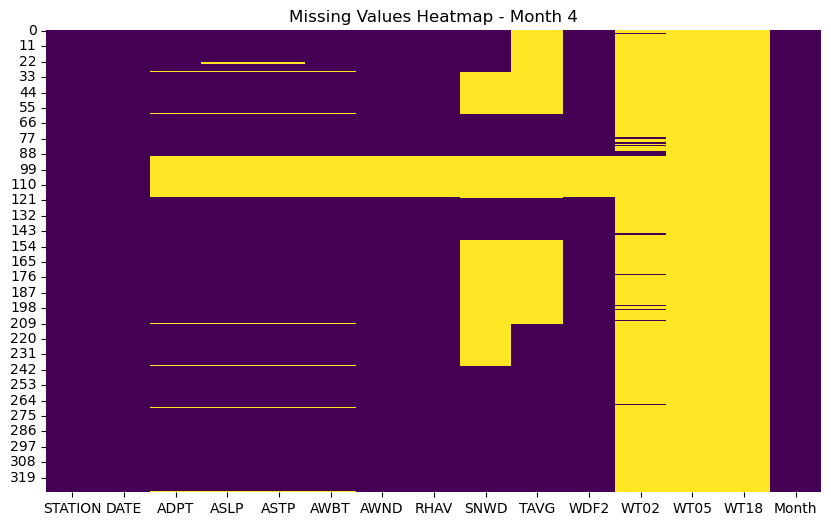

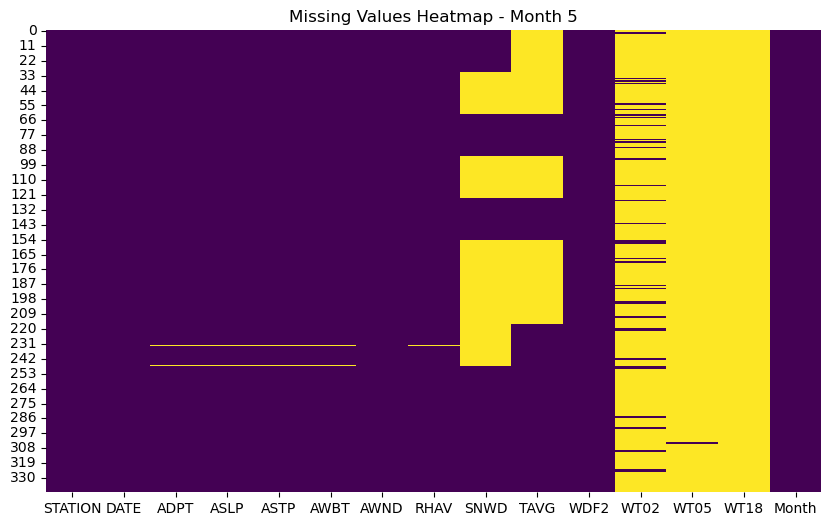

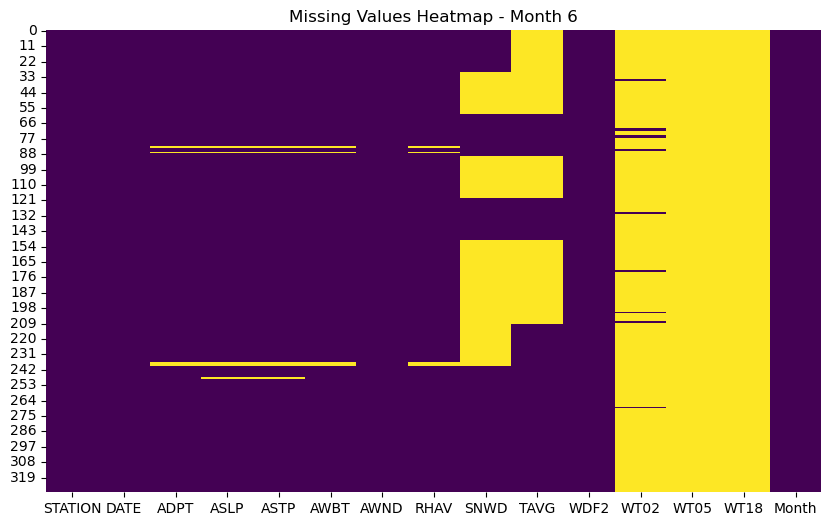

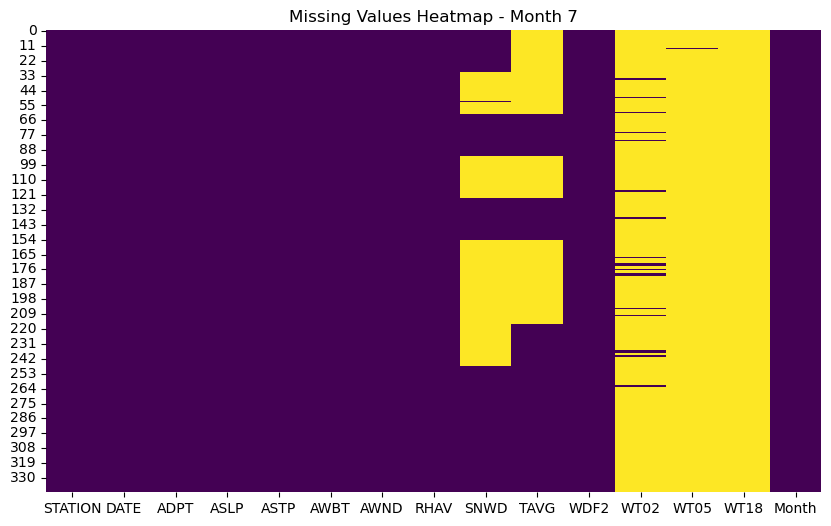

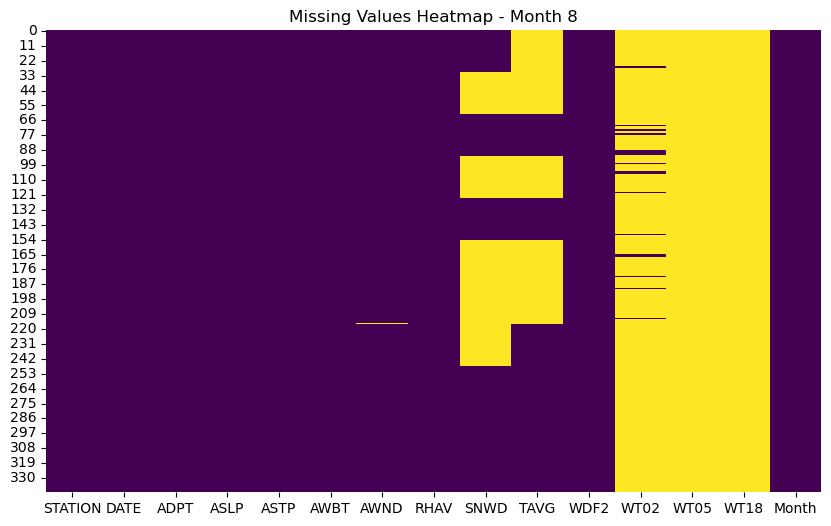

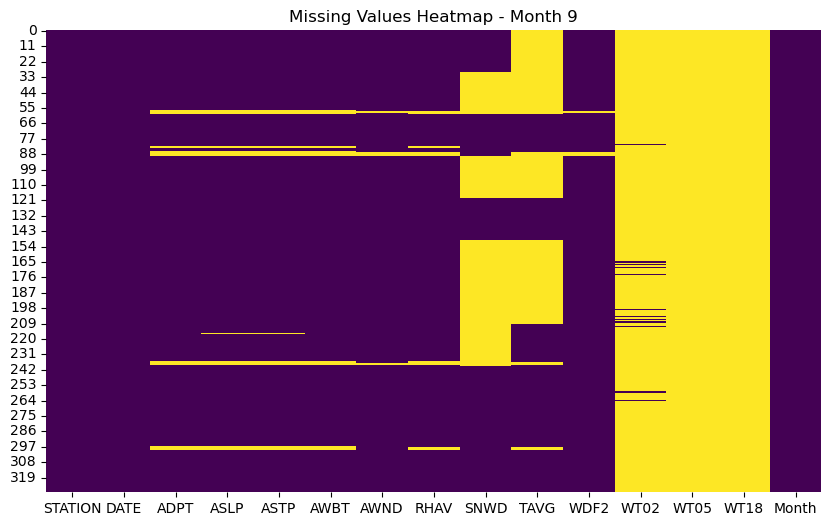

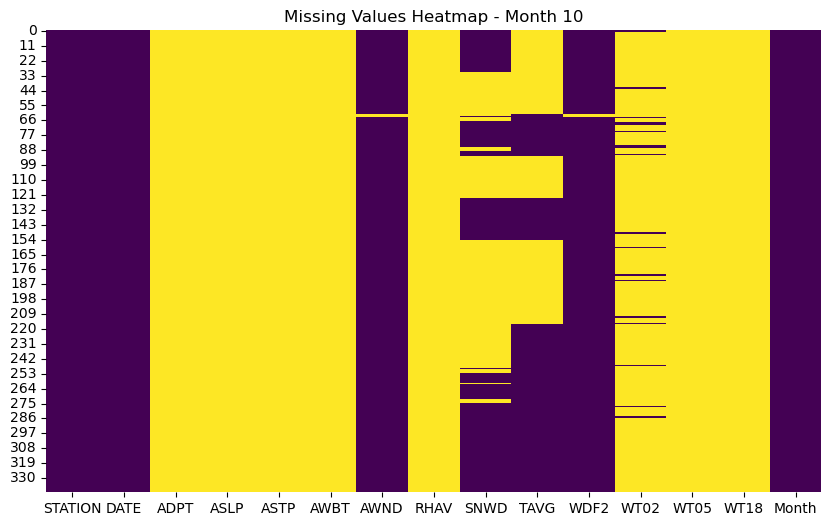

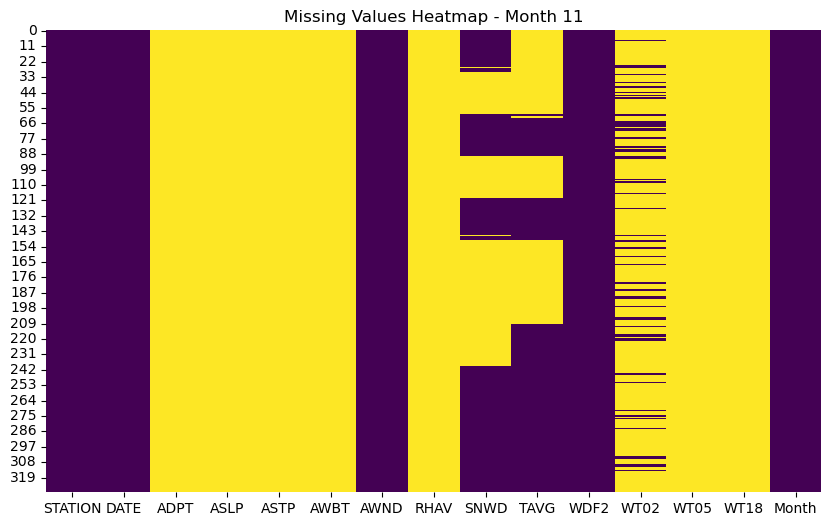

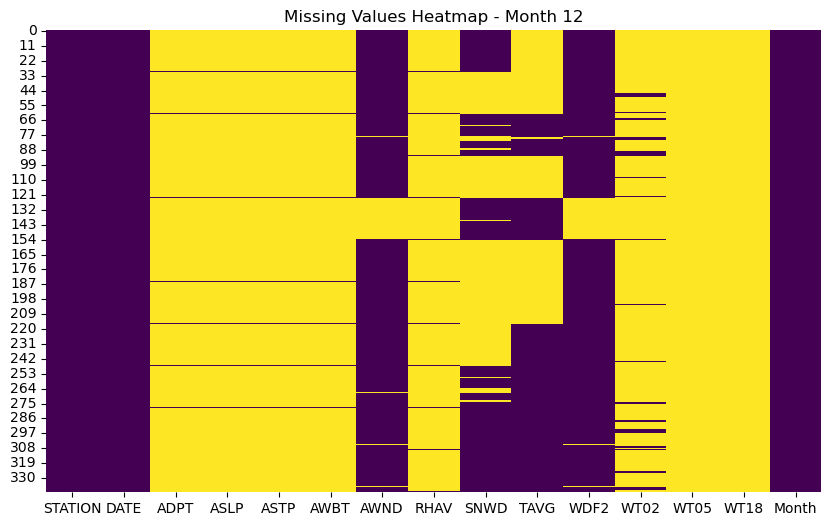

In [191]:

def tplot_missing_values_heatmap(tdf, tmonth):
    plt.figure(figsize=(10, 6))
    sns.heatmap(tdf.isnull(), cbar=False, cmap="viridis")
    plt.title(f"Missing Values Heatmap - Month {tmonth}")
    plt.show()

for tmonth, tdf in mtest_dfs.items():
    plot_missing_values_heatmap(tdf, tmonth)

In [192]:
for month, df in monthly_dfs.items():
    df.drop(['WT02','WT05','WT18'], axis=1, inplace=True,errors='ignore')
monthly_dfs[1].head()    

,STATION,DATE,ADPT,ASLP,ASTP,AWBT,AWND,RHAV,SNWD,TAVG,WDF2,Month
0,USW00013880,2000-01-01,NaN,NaN,NaN,NaN,2.46,NaN,0.0,57.0,120.0,1
1,USW00013880,2000-01-02,NaN,NaN,NaN,NaN,4.70,NaN,0.0,61.0,190.0,1
2,USW00013880,2000-01-03,NaN,NaN,NaN,NaN,4.47,NaN,0.0,63.0,170.0,1
3,USW00013880,2000-01-04,NaN,NaN,NaN,NaN,14.09,NaN,0.0,66.0,200.0,1
4,USW00013880,2000-01-05,NaN,NaN,NaN,NaN,10.29,NaN,0.0,48.0,310.0,1


In [193]:
for tmonth, tdf in mtest_dfs.items():
    tdf.drop(['WT02','WT05','WT18'], axis=1, inplace=True,errors='ignore')
mtest_dfs[1].head()  

,STATION,DATE,ADPT,ASLP,ASTP,AWBT,AWND,RHAV,SNWD,TAVG,WDF2,Month
0,USW00013880,2024-01-01,37.0,30.10,30.04,45.0,8.95,59.0,0.0,NaN,360.0,1
1,USW00013880,2024-01-02,27.0,30.21,30.15,37.0,6.49,54.0,0.0,NaN,10.0,1
2,USW00013880,2024-01-03,32.0,30.12,30.09,39.0,3.13,64.0,0.0,NaN,330.0,1
3,USW00013880,2024-01-04,34.0,30.10,30.02,41.0,8.50,64.0,0.0,NaN,340.0,1
4,USW00013880,2024-01-05,33.0,30.25,30.21,41.0,10.29,60.0,0.0,NaN,90.0,1


In [194]:
# Function to apply KNN Imputation for each month
from sklearn.impute import KNNImputer
def impute_knn(df):
    imputer = KNNImputer(n_neighbors=5) 
    df.iloc[:, 2:] = imputer.fit_transform(df.iloc[:, 2:])  # Skip 'STATION' and 'DATE' columns as they're non-numerical
    return df

for month in range(1, 13):
    monthly_dfs[month] = impute_knn(monthly_dfs[month])
    
# Check if missing values have been  filled for december
print(monthly_dfs[12].isnull().sum())  

STATION    0
DATE       0
ADPT       0
ASLP       0
ASTP       0
AWBT       0
AWND       0
RHAV       0
SNWD       0
TAVG       0
WDF2       0
Month      0
dtype: int64


In [196]:
for tmonth, tdf in mtest_dfs.items():
    tdf.drop(['ADPT','AWBT'], axis=1, inplace=True,errors='ignore')

mtest_dfs[1].info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  341 non-null    object 
 1   DATE     341 non-null    object 
 2   ASLP     341 non-null    float64
 3   ASTP     341 non-null    float64
 4   AWND     341 non-null    float64
 5   RHAV     341 non-null    float64
 6   SNWD     341 non-null    float64
 7   TAVG     341 non-null    float64
 8   WDF2     341 non-null    float64
 9   Month    341 non-null    float64
dtypes: float64(8), object(2)
memory usage: 26.8+ KB


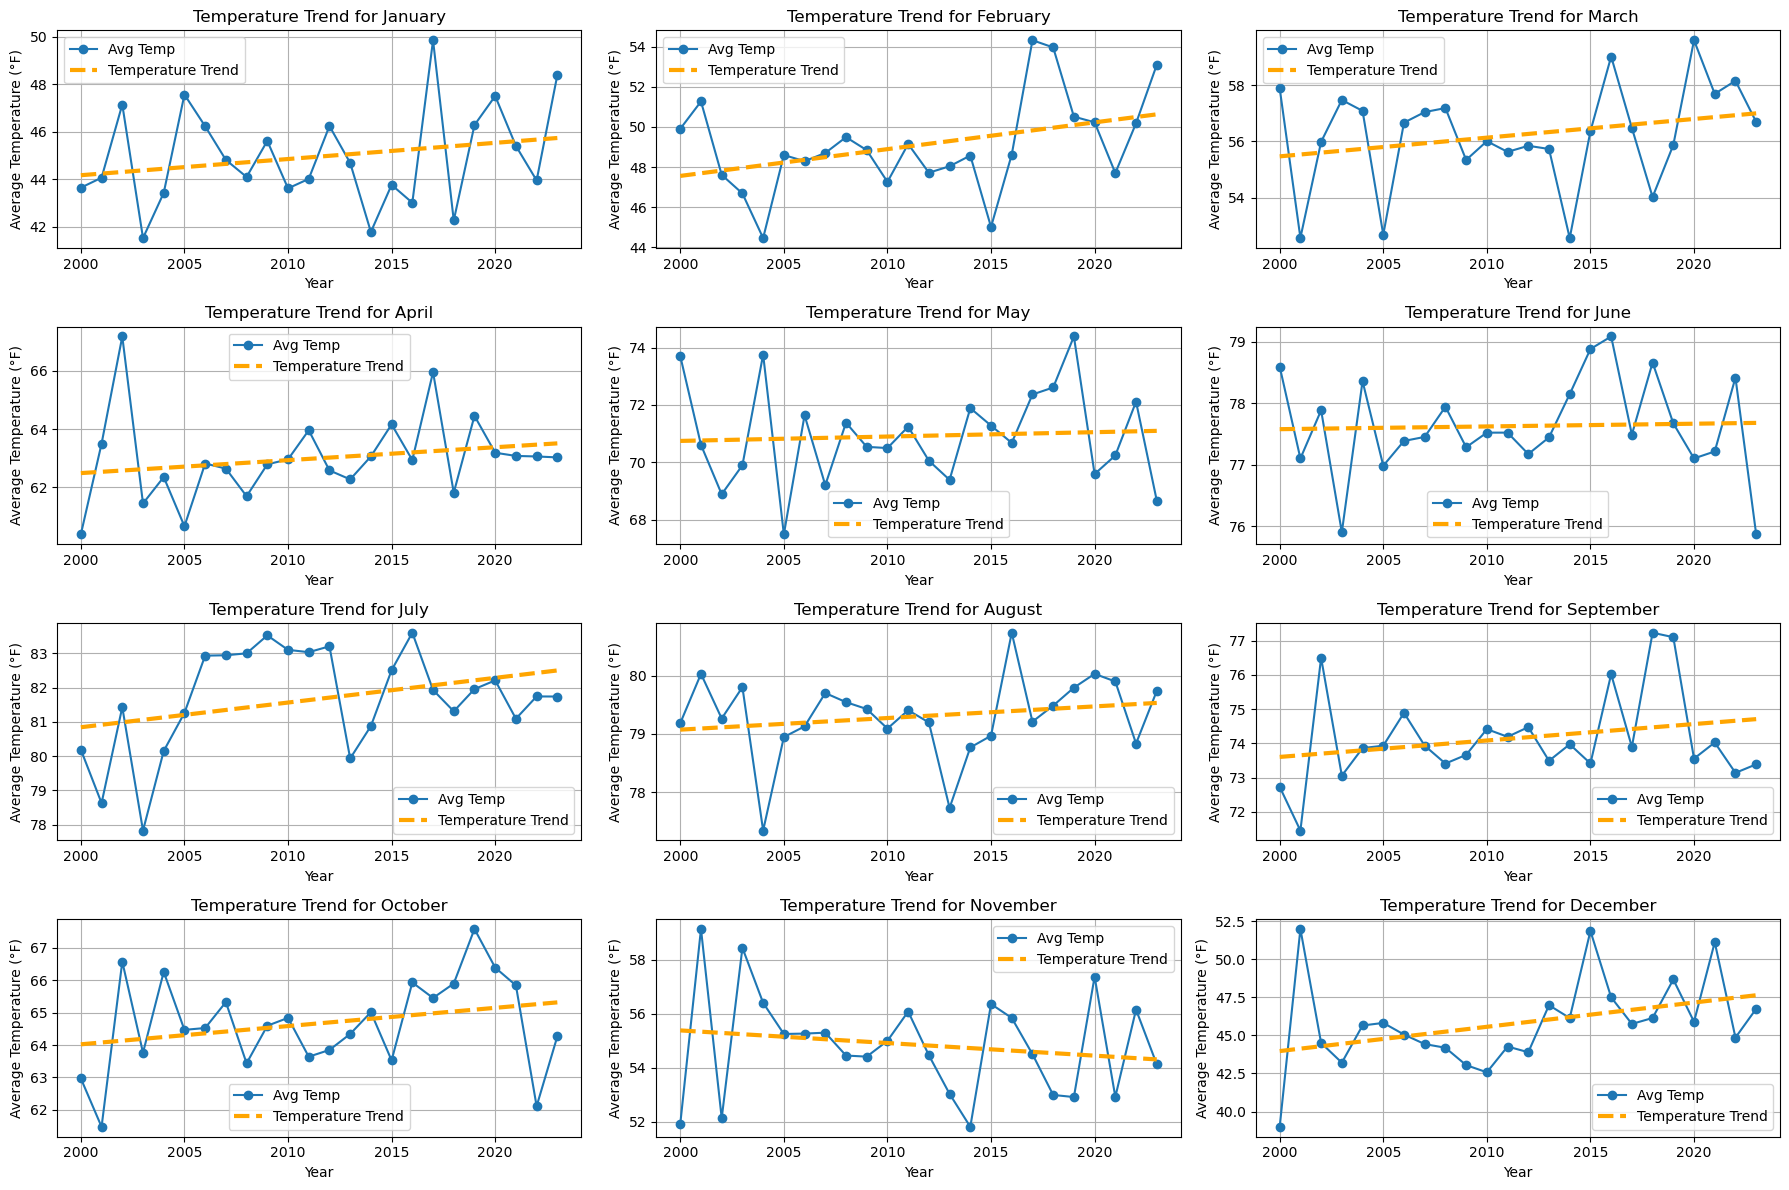

In [197]:
# Linear plots showing monthly average temperature trends from 2000–2023
dfs = [monthly_dfs[i] for i in range(1, 13)]
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Set up a 3-column layout
fig, axes = plt.subplots(4, 3, figsize=(18, 12))  
axes = axes.flatten() 

for i, df in enumerate(dfs):
    df['DATE'] = pd.to_datetime(df['DATE'])  # Ensure date is in datetime format
    monthly_avg = df.groupby(df['DATE'].dt.year)['TAVG'].mean()# avg temp for january
    
    ax = axes[i]
    
    # Plot on corresponding subplot
    ax.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-', label='Avg Temp')

    trend = pd.Series(monthly_avg.index)
 
    z = np.polyfit(trend, monthly_avg.values, 1)  # Fit linear trend
    p = np.poly1d(z)
    
    # Plot the trend line on the same plot.
    ax.plot(monthly_avg.index, p(monthly_avg.index), linestyle='--', linewidth=3, color='orange', label='Temperature Trend')

    ax.set_xlabel("Year")
    ax.set_ylabel("Average Temperature (°F)")
    ax.set_title(f"Temperature Trend for {month_names[i]}")
    ax.grid(True)
    ax.legend()

# Adjust layout and show plots
plt.tight_layout()
plt.show()


In [198]:
monthly_dfs[1].head()

,STATION,DATE,ADPT,ASLP,ASTP,AWBT,AWND,RHAV,SNWD,TAVG,WDF2,Month
0,USW00013880,2000-01-01,39.6,30.100,29.686,42.8,2.46,82.2,0.0,57.0,120.0,1.0
1,USW00013880,2000-01-02,42.4,30.106,29.814,46.8,4.70,82.4,0.0,61.0,190.0,1.0
2,USW00013880,2000-01-03,42.6,30.190,30.102,46.2,4.47,80.0,0.0,63.0,170.0,1.0
3,USW00013880,2000-01-04,51.0,30.008,29.784,53.4,14.09,80.6,0.0,66.0,200.0,1.0
4,USW00013880,2000-01-05,36.2,30.058,29.798,42.8,10.29,72.4,0.0,48.0,310.0,1.0


In [199]:
pc = {}
for month, df in monthly_dfs.items():
    pearson = df.corr(method='pearson', min_periods=1)# Pearson correlation to find linear correlation for each month
    pc[month] = pearson
    
pc[3]


,ADPT,ASLP,ASTP,AWBT,AWND,RHAV,SNWD,TAVG,WDF2,Month
ADPT,1.000000,-0.261334,0.113923,0.958024,0.085518,0.729502,-0.037529,0.426428,-0.025977,NaN
ASLP,-0.261334,1.000000,0.482697,-0.255764,-0.336555,-0.207090,0.000491,-0.182718,-0.328201,NaN
ASTP,0.113923,0.482697,1.000000,0.095528,-0.005256,0.106203,-0.023739,0.003246,-0.162726,NaN
AWBT,0.958024,-0.255764,0.095528,1.000000,0.095921,0.518363,-0.049108,0.481215,0.046219,NaN
AWND,0.085518,-0.336555,-0.005256,0.095921,1.000000,0.020551,0.005152,0.068671,0.097459,NaN
RHAV,0.729502,-0.207090,0.106203,0.518363,0.020551,1.000000,-0.001992,0.136127,-0.163852,NaN
SNWD,-0.037529,0.000491,-0.023739,-0.049108,0.005152,-0.001992,1.000000,-0.008793,-0.032999,NaN
TAVG,0.426428,-0.182718,0.003246,0.481215,0.068671,0.136127,-0.008793,1.000000,0.113441,NaN
WDF2,-0.025977,-0.328201,-0.162726,0.046219,0.097459,-0.163852,-0.032999,0.113441,1.000000,NaN
Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
# High multicollenearity observed above for ADPT, AWBT, and between ASTP and ASLP. Confirm below

In [201]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

features = ["ADPT", "ASLP", "ASTP", "AWBT", "AWND", "RHAV", "WDF2"]
for month, df in monthly_dfs.items():
    X = df[features]

    # Add a constant for VIF calculation
    X_with_const = add_constant(X)

    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_with_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

    # Display VIF
    print(vif_data)


  Feature           VIF
0   const  43845.027756
1    ADPT    160.290248
2    ASLP      2.127821
3    ASTP      1.446104
4    AWBT    101.436603
5    AWND      1.264380
6    RHAV     13.932619
7    WDF2      1.177998
  Feature           VIF
0   const  48277.128467
1    ADPT    154.692965
2    ASLP      1.727256
3    ASTP      1.352385
4    AWBT     95.670987
5    AWND      1.184377
6    RHAV     18.037506
7    WDF2      1.207854
  Feature           VIF
0   const  46115.528058
1    ADPT    127.272648
2    ASLP      1.981016
3    ASTP      1.490059
4    AWBT     81.973844
5    AWND      1.189918
6    RHAV     14.329545
7    WDF2      1.222603
  Feature           VIF
0   const  56361.031246
1    ADPT    114.588960
2    ASLP      1.974278
3    ASTP      1.488539
4    AWBT     72.088609
5    AWND      1.281518
6    RHAV     12.530629
7    WDF2      1.318264
  Feature           VIF
0   const  69665.561838
1    ADPT     79.177765
2    ASLP      1.568758
3    ASTP      1.404651
4    AWBT     58

In [202]:
monthly_dfs1 =monthly_dfs.copy()
#remove highly correlated features 
for month, df in monthly_dfs1.items():
    monthly_dfs1[month] = df.drop(["ADPT",  "ASTP", "AWBT"], axis=1, errors='ignore')
monthly_dfs1[1]

,STATION,DATE,ASLP,AWND,RHAV,SNWD,TAVG,WDF2,Month
0,USW00013880,2000-01-01,30.100,2.460,82.2,0.0,57.0,120.0,1.0
1,USW00013880,2000-01-02,30.106,4.700,82.4,0.0,61.0,190.0,1.0
2,USW00013880,2000-01-03,30.190,4.470,80.0,0.0,63.0,170.0,1.0
3,USW00013880,2000-01-04,30.008,14.090,80.6,0.0,66.0,200.0,1.0
4,USW00013880,2000-01-05,30.058,10.290,72.4,0.0,48.0,310.0,1.0
...,...,...,...,...,...,...,...,...,...
8178,USW00013881,2023-01-27,30.230,4.250,55.0,0.0,39.0,290.0,1.0
8179,USW00013881,2023-01-28,30.360,5.146,55.0,0.0,42.0,140.0,1.0
8180,USW00013881,2023-01-29,30.270,4.700,70.0,0.0,46.0,170.0,1.0
8181,USW00013881,2023-01-30,30.160,3.360,84.0,0.0,53.0,200.0,1.0


### Polynomial regression

In [203]:
monthly_dfs_poly = monthly_dfs1.copy()
monthly_dfs_poly

{1:           STATION       DATE    ASLP    AWND  RHAV  SNWD  TAVG   WDF2  Month
 0     USW00013880 2000-01-01  30.100   2.460  82.2   0.0  57.0  120.0    1.0
 1     USW00013880 2000-01-02  30.106   4.700  82.4   0.0  61.0  190.0    1.0
 2     USW00013880 2000-01-03  30.190   4.470  80.0   0.0  63.0  170.0    1.0
 3     USW00013880 2000-01-04  30.008  14.090  80.6   0.0  66.0  200.0    1.0
 4     USW00013880 2000-01-05  30.058  10.290  72.4   0.0  48.0  310.0    1.0
 ...           ...        ...     ...     ...   ...   ...   ...    ...    ...
 8178  USW00013881 2023-01-27  30.230   4.250  55.0   0.0  39.0  290.0    1.0
 8179  USW00013881 2023-01-28  30.360   5.146  55.0   0.0  42.0  140.0    1.0
 8180  USW00013881 2023-01-29  30.270   4.700  70.0   0.0  46.0  170.0    1.0
 8181  USW00013881 2023-01-30  30.160   3.360  84.0   0.0  53.0  200.0    1.0
 8182  USW00013881 2023-01-31  30.120   4.700  94.0   0.0  54.0  180.0    1.0
 
 [8183 rows x 9 columns],
 2:           STATION       DATE 

In [204]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


results_poly = {}

for month, df in monthly_dfs_poly.items(): 
    X = df.drop(columns=['DATE', 'STATION','TAVG'], errors='ignore')
    y = df['TAVG']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    tscv = TimeSeriesSplit(n_splits=5)
    train_r2s, test_r2s = [], []
    train_rmses, test_rmses = [], []

    for train_index, test_index in tscv.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        poly = PolynomialFeatures(degree=2, include_bias=False)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))
        train_rmses.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        test_rmses.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    # Average over folds
    results_poly[month] = {
        "Train R²": np.mean(train_r2s),
        "Test R²": np.mean(test_r2s),
        "Train RMSE": np.mean(train_rmses),
        "Test RMSE": np.mean(test_rmses)
    }

# Final metrics DataFrame
metrics_dict = pd.DataFrame.from_dict(results_poly, orient='index')
metrics_dict

,Train R²,Test R²,Train RMSE,Test RMSE
1,0.286431,0.207494,6.984805,7.515212
2,0.214822,0.055326,6.119491,7.086634
3,0.191523,-13.009125,6.029231,17.780217
4,0.226529,0.167093,5.151989,5.509982
5,0.256170,0.150854,4.520649,5.218457
6,0.205346,-0.237348,2.864338,3.963228
7,0.070237,0.013035,3.980431,4.613398
8,0.116779,0.099903,3.385273,3.296145
9,0.220935,0.145888,3.535145,4.043780
10,0.108500,0.042339,5.234872,5.762179


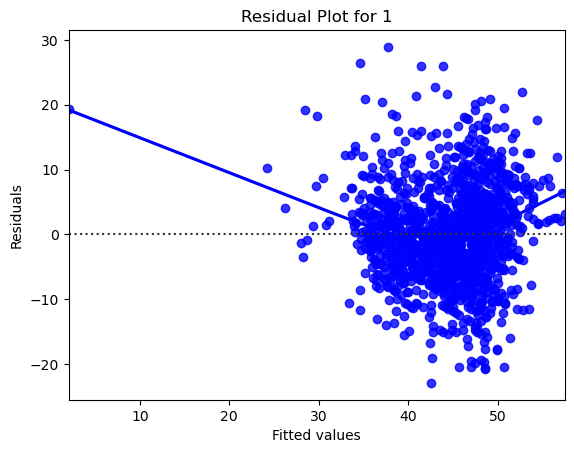

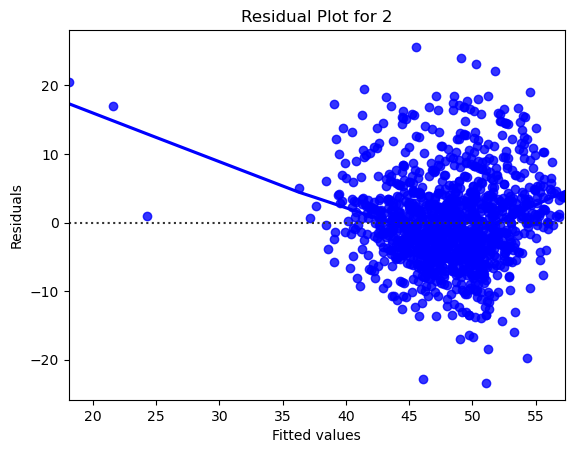

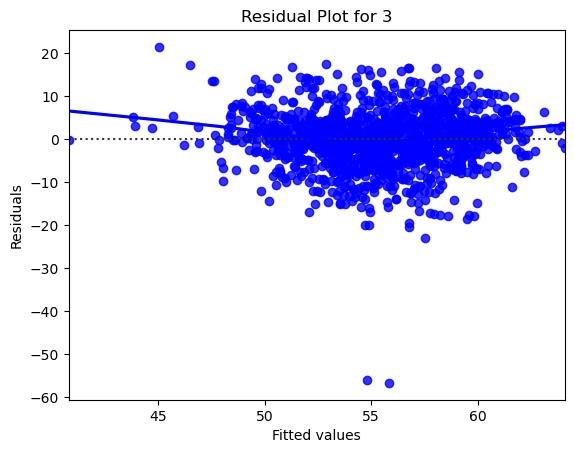

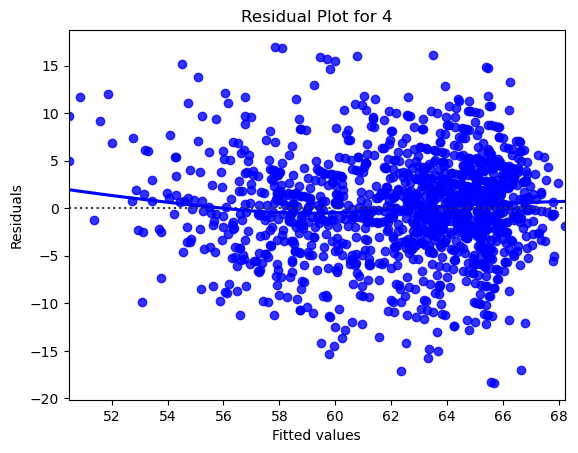

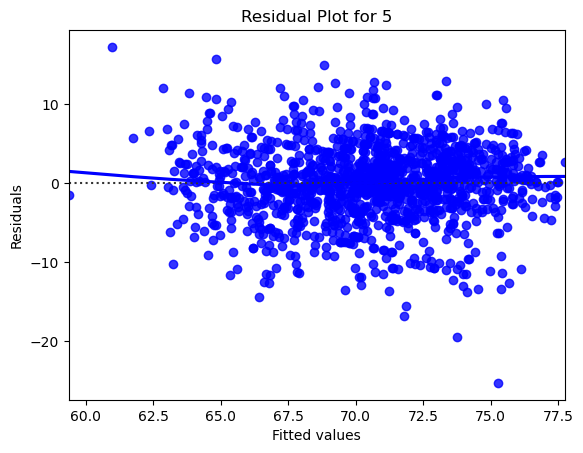

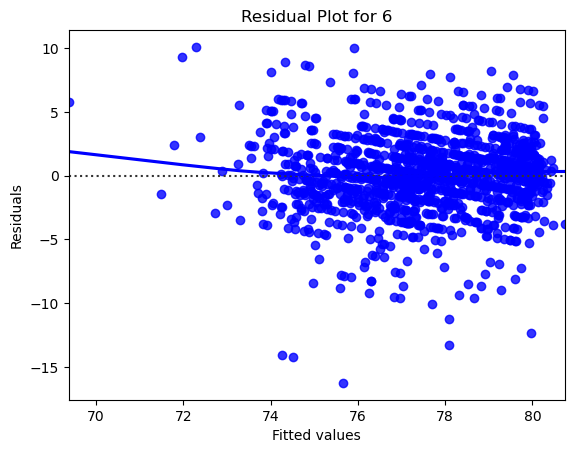

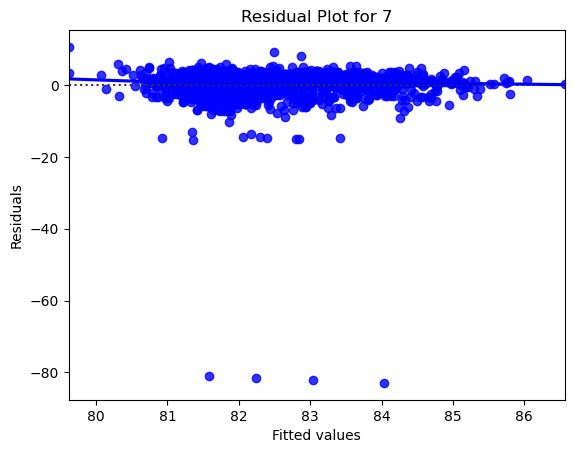

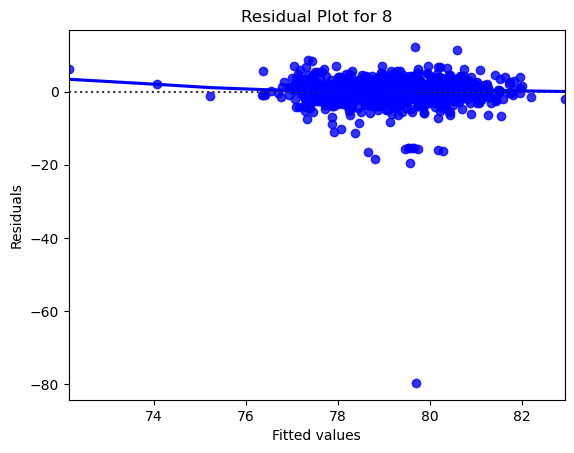

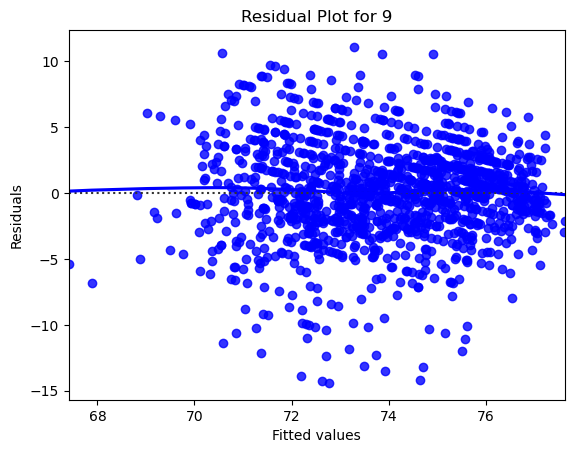

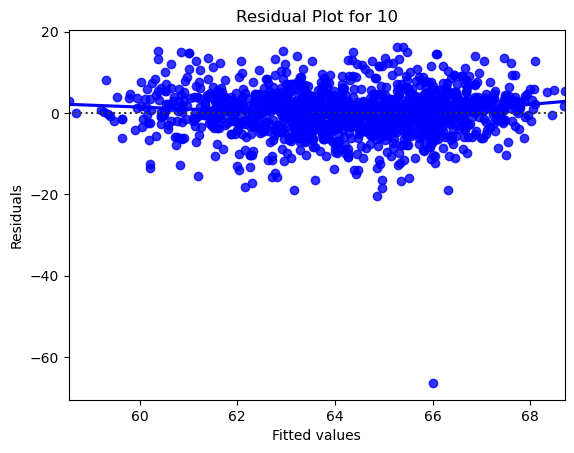

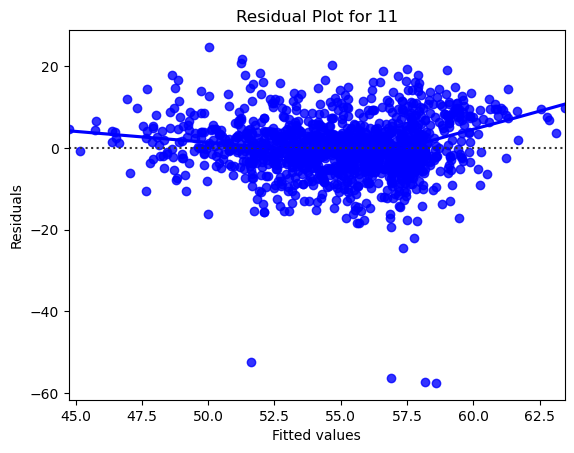

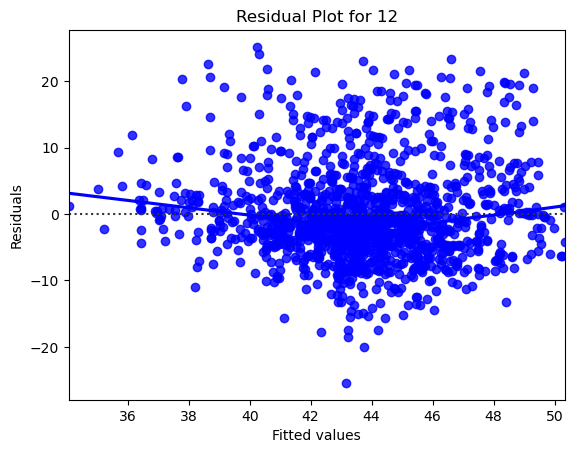

In [205]:


results_poly = {}

for month, df in monthly_dfs_poly.items():
    X = df.drop(columns=['DATE', 'STATION','TAVG'], errors='ignore')
    y = df['TAVG']

 
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Add polynomial features
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X_scaled)

    # TimeSeriesSplit (showing 1 fold only per month)
    tscv = TimeSeriesSplit(n_splits=5)
    for train_index, test_index in tscv.split(X_poly):
        X_train_poly, X_test_poly = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        break  # Just do one fold for residual plotting

    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

   
    y_test_pred = model.predict(X_test_poly)
    residuals = y_test - y_test_pred

    
    sns.residplot(x=y_test_pred, y=residuals, lowess=True, color="blue")
    plt.xlabel("Fitted values")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot for {month}")
    plt.show()

        

### Random Forest Regression

In [206]:
monthly_dfs_rf = monthly_dfs1.copy()# for running the rf model
monthly_dfs_rf[1].head()

,STATION,DATE,ASLP,AWND,RHAV,SNWD,TAVG,WDF2,Month
0,USW00013880,2000-01-01,30.100,2.46,82.2,0.0,57.0,120.0,1.0
1,USW00013880,2000-01-02,30.106,4.70,82.4,0.0,61.0,190.0,1.0
2,USW00013880,2000-01-03,30.190,4.47,80.0,0.0,63.0,170.0,1.0
3,USW00013880,2000-01-04,30.008,14.09,80.6,0.0,66.0,200.0,1.0
4,USW00013880,2000-01-05,30.058,10.29,72.4,0.0,48.0,310.0,1.0


#### Don't remove outliers since it random forest is robust to outliers and removing these values coud be legitimate extremes that hurts the model

In [207]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit


results_randomForest = {}

for month, df in monthly_dfs_rf.items(): 
    X = df.drop(columns=['DATE', 'STATION','TAVG'], errors='ignore')
    y = df['TAVG']

    
    tscv = TimeSeriesSplit(n_splits=5)# perfrom cv on time series data preserving order.
    
    train_r2s, test_r2s = [], []
    train_rmses, test_rmses = [], []
    
    for train_index, test_index in tscv.split(X):#Creates a time series cross-validator that splits the data 5 times.
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        #Each training set includes all time steps before the test set (no future data leaks into the past)

        rf_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=10,               
        min_samples_leaf=1,      
        random_state=42)


        rf_model.fit(X_train, y_train)
        
      
        
        # Make predictions
        y_train_pred = rf_model.predict(X_train)
        y_test_pred = rf_model.predict(X_test)

        # Compute evaluation metrics
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))
        train_rmses.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        test_rmses.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

       

    results_randomForest[month] = {
    "Train R²": np.mean(train_r2s),
    "Test R²": np.mean(test_r2s),
    "Train RMSE": np.mean(train_rmses),
    "Test RMSE": np.mean(test_rmses),
}


results_df = pd.DataFrame(results_randomForest)
results_df



,1,2,3,4,5,6,7,8,9,10,11,12
Train R²,0.658318,0.670282,0.636165,0.617846,0.642902,0.667358,0.646965,0.731651,0.666724,0.637038,0.644505,0.601299
Test R²,0.300492,0.099401,0.211757,0.223634,0.234723,0.083249,-0.038519,0.110682,0.224159,0.097165,0.134483,0.140076
Train RMSE,4.806187,3.943570,4.029800,3.596431,3.113137,1.844625,2.456531,1.845961,2.302664,3.317750,4.044282,4.596971
Test RMSE,7.079070,6.821025,6.318325,5.330157,4.960048,3.432046,4.712380,3.245010,3.855457,5.599079,6.720982,7.170102


In [208]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor

tscv = TimeSeriesSplit(n_splits=5)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 5, 10],
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Grid search using time-series split
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)
for month, df in monthly_dfs_rf.items(): 
    X = df.drop(columns=['DATE', 'STATION','TAVG'], errors='ignore')
    y = df['TAVG']

    grid_search.fit(X, y)

    # Best parameters found
    print("Best Parameters:", grid_search.best_params_)
    print("Best RMSE:", -grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 100}
Best RMSE: 7.065560529039786
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 100}
Best RMSE: 6.775357954586174
Best Parameters: {'max_depth': None, 'min_samples_leaf': 10, 'n_estimators': 100}
Best RMSE: 6.289053940832441
Best Parameters: {'max_depth': None, 'min_samples_leaf': 10, 'n_estimators': 100}
Best RMSE: 5.3036034988808485
Best Parameters: {'max_depth': None, 'min_samples_leaf': 5, 'n_estimators': 100}
Best RMSE: 4.938411691737957
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 100}
Best RMSE: 3.342137558964162
Best Parameters: {'max_depth': None, 'min_samples_leaf': 5, 'n_estimators': 100}
Best RMSE: 4.540738843378316
Best Parameters: {'max_depth': None, 'min_samples_leaf': 5, 'n_estimators': 100}
Best RMSE: 3.144762659549846
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 100}
Best RMSE: 3.8313998865130094
Best Paramet

In [209]:
monthly_dfs_rf1= monthly_dfs_rf.copy()# for running the rf model
monthly_dfs_rf1[1]

,STATION,DATE,ASLP,AWND,RHAV,SNWD,TAVG,WDF2,Month
0,USW00013880,2000-01-01,30.100,2.460,82.2,0.0,57.0,120.0,1.0
1,USW00013880,2000-01-02,30.106,4.700,82.4,0.0,61.0,190.0,1.0
2,USW00013880,2000-01-03,30.190,4.470,80.0,0.0,63.0,170.0,1.0
3,USW00013880,2000-01-04,30.008,14.090,80.6,0.0,66.0,200.0,1.0
4,USW00013880,2000-01-05,30.058,10.290,72.4,0.0,48.0,310.0,1.0
...,...,...,...,...,...,...,...,...,...
8178,USW00013881,2023-01-27,30.230,4.250,55.0,0.0,39.0,290.0,1.0
8179,USW00013881,2023-01-28,30.360,5.146,55.0,0.0,42.0,140.0,1.0
8180,USW00013881,2023-01-29,30.270,4.700,70.0,0.0,46.0,170.0,1.0
8181,USW00013881,2023-01-30,30.160,3.360,84.0,0.0,53.0,200.0,1.0


In [210]:
# compute 7 day rolling averages to add to predictor variables
main_features = ['WDF2', 'RHAV', 'AWND', 'ASLP','SNWD']

for month, df in monthly_dfs_rf1.items():
    df = df.sort_values('DATE')  # This ensures the data are time-ordered
    df['SnowDepth_non-zero'] = (df['SNWD'] > 0).astype(int) # create a binary variable
    df.drop(['SNWD'], axis=1, errors='ignore')  
    for feature in main_features:
        df[f'{feature}_rolling7'] = df[feature].rolling(window=7, min_periods=1).mean()
    
    
monthly_dfs_rf1[1]

,STATION,DATE,ASLP,AWND,RHAV,SNWD,TAVG,WDF2,Month
0,USW00013880,2000-01-01,30.100,2.460,82.2,0.0,57.0,120.0,1.0
1,USW00013880,2000-01-02,30.106,4.700,82.4,0.0,61.0,190.0,1.0
2,USW00013880,2000-01-03,30.190,4.470,80.0,0.0,63.0,170.0,1.0
3,USW00013880,2000-01-04,30.008,14.090,80.6,0.0,66.0,200.0,1.0
4,USW00013880,2000-01-05,30.058,10.290,72.4,0.0,48.0,310.0,1.0
...,...,...,...,...,...,...,...,...,...
8178,USW00013881,2023-01-27,30.230,4.250,55.0,0.0,39.0,290.0,1.0
8179,USW00013881,2023-01-28,30.360,5.146,55.0,0.0,42.0,140.0,1.0
8180,USW00013881,2023-01-29,30.270,4.700,70.0,0.0,46.0,170.0,1.0
8181,USW00013881,2023-01-30,30.160,3.360,84.0,0.0,53.0,200.0,1.0


In [211]:
results_randomForest = {}

dfs = [monthly_dfs_rf1[i] for i in range(1, 13)]
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]


X =dfs[9].drop(columns=['DATE', 'STATION','TAVG'], errors='ignore')
y = dfs[9]['TAVG']


le = LabelEncoder()
dfs[9]['STATION_ENCODED'] = le.fit_transform(dfs[9]['STATION'])



tscv = TimeSeriesSplit(n_splits=5)
train_r2s, test_r2s = [], []
train_rmses, test_rmses = [], []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_model = RandomForestRegressor(
        n_estimators=100,
        max_depth=None,
        min_samples_leaf=10,
        random_state=42
    )

    rf_model.fit(X_train, y_train)

    y_train_pred = rf_model.predict(X_train)
    y_test_pred = rf_model.predict(X_test)

    train_r2s.append(r2_score(y_train, y_train_pred))
    test_r2s.append(r2_score(y_test, y_test_pred))
    train_rmses.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmses.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

results_randomForest[month_names[9]] = {
    "Test R²": np.mean(test_r2s),
    "Train RMSE": np.mean(train_rmses),
    "Test RMSE": np.mean(test_rmses),
}

print(results_randomForest)


{'Oct': {'Test R²': 0.12013828665242472, 'Train RMSE': 4.078708752733535, 'Test RMSE': 5.524280809630968}}


In [212]:
monthsrf = {'Jan': { 'Test R²': 0.2840826491722489, 'Train RMSE': 5.113166411112834, 'Test RMSE': 7.155172061301089}
,'Feb': {'Test R²': 0.14402804437961633, 'Train RMSE': 4.682394013966945, 'Test RMSE': 6.715229534676098}
,'Mar': {'Test R²': 0.21456535030233842, 'Train RMSE': 4.658328675195863, 'Test RMSE': 6.309095249075607}
,'Apr': {'Test R²': 0.21882461130203695, 'Train RMSE': 4.092370977914301, 'Test RMSE': 5.34927703632287}
,'May': {'Test R²': 0.1914818453343749, 'Train RMSE': 3.05524766410722, 'Test RMSE': 5.100513251272143}
,'Jun': {'Test R²': 0.11625779593512393, 'Train RMSE': 2.355726942246008, 'Test RMSE': 3.3724450821531726}
,'Jul': {'Test R²': 0.02915850868063834, 'Train RMSE': 3.0632088213358797, 'Test RMSE': 4.584271427317981}
,'Aug': {'Test R²': 0.1824414062102349, 'Train RMSE': 2.390057709229774, 'Test RMSE': 3.1370355528359526}
,'Sep': {'Test R²': 0.2211319165419149, 'Train RMSE': 2.590381637871863, 'Test RMSE': 3.8649900594780098}
,'Oct': {'Test R²': 0.09757756414013496, 'Train RMSE': 4.415049135169715, 'Test RMSE': 4.951596963886052}
,'Nov': {'Test R²': 0.09568793802054446, 'Train RMSE': 5.082324175013962, 'Test RMSE': 6.176790371047876}
,'Dec': {'Test R²': 0.1589401040349782, 'Train RMSE': 5.130640495399314, 'Test RMSE': 7.09114065354637}}


rf_df = pd.DataFrame.from_dict(monthsrf , orient='index')

rf_df


,Test R²,Train RMSE,Test RMSE
Jan,0.284083,5.113166,7.155172
Feb,0.144028,4.682394,6.715230
Mar,0.214565,4.658329,6.309095
Apr,0.218825,4.092371,5.349277
May,0.191482,3.055248,5.100513
Jun,0.116258,2.355727,3.372445
Jul,0.029159,3.063209,4.584271
Aug,0.182441,2.390058,3.137036
Sep,0.221132,2.590382,3.864990
Oct,0.097578,4.415049,4.951597


### XG BOOST Regression

In [213]:
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

results_xg = {}

for month, df in monthly_dfs_rf1.items(): 
    le = LabelEncoder()
    df['STATION_ENCODED'] = le.fit_transform(df['STATION'])
    
    X = df.drop(columns=['TAVG', 'DATE', 'STATION'], errors='ignore')
    y = df['TAVG']

    
    tscv = TimeSeriesSplit(n_splits=5)# perfrom cv on time series data preserving order.
    
    train_r2s, test_r2s = [], []
    train_rmses, test_rmses = [], []
    
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        xgb_model = XGBRegressor(
            n_estimators=50,
            max_depth=7,
            learning_rate= 0.1,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42
        )

        xgb_model.fit(X_train, y_train)

        # Predict
        y_train_pred = xgb_model.predict(X_train)
        y_test_pred = xgb_model.predict(X_test)

        # Collect metrics
        train_r2s.append(r2_score(y_train, y_train_pred))
        test_r2s.append(r2_score(y_test, y_test_pred))
        train_rmses.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        test_rmses.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    # Store averaged metrics
    results_xg[month] = {
        "Train R²": np.mean(train_r2s),
        "Test R²": np.mean(test_r2s),
        "Train RMSE": np.mean(train_rmses),
        "Test RMSE": np.mean(test_rmses),
    }

# Convert to DataFrame
results_df = pd.DataFrame(results_xg)
results_df



,1,2,3,4,5,6,7,8,9,10,11,12
Train R²,0.691430,0.702548,0.656572,0.651824,0.687060,0.695112,0.677989,0.774152,0.682795,0.642353,0.654343,0.659971
Test R²,0.292511,0.136596,0.224386,0.234037,0.205740,0.106406,-0.078833,0.142303,0.210087,0.126979,0.142107,0.146743
Train RMSE,4.565139,3.739731,3.912420,3.432898,2.911793,1.764763,2.346431,1.682329,2.240350,3.292534,3.981923,4.247674
Test RMSE,7.115299,6.735066,6.269875,5.294749,5.054287,3.394418,4.786325,3.200716,3.896296,5.519109,6.709747,7.148875


In [214]:
# GridSrarch XGBoost for the best parameters
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from xgboost import XGBRegressor

tscv = TimeSeriesSplit(n_splits=5)

# Parameter grid to search over
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# XGBoost regressor
xgb = XGBRegressor(random_state=42)

# Grid search with time series split
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_root_mean_squared_error'  ,
    verbose=2,
    n_jobs=-1
)
for month, df in monthly_dfs_rf1.items(): 
    X = df.drop(columns=['DATE', 'STATION','TAVG'], errors='ignore')
    y = df['TAVG']

    grid_search.fit(X, y)

    # Best parameters found
    print("Best Parameters:", grid_search.best_params_)
    print("Best RMSE:", -grid_search.best_score_)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


C:\Users\ngangaa\AppData\Roaming\Python\Python39\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
Best RMSE: 7.0729667388757305
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best RMSE: 6.626494316784052
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}
Best RMSE: 6.229504745170778
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
Best RMSE: 5.283255150350994
Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
Best RMSE: 5.0011277932562255
Fitti

In [215]:
results_xgboost = {}

dfs = [monthly_dfs_rf1[i] for i in range(1, 13)]
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]


X =dfs[0].drop(columns=['DATE', 'STATION','TAVG'], errors='ignore')
y = dfs[0]['TAVG']


tscv = TimeSeriesSplit(n_splits=5)
train_r2s, test_r2s = [], []
train_rmses, test_rmses = [], []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    xgb_model = XGBRegressor(
            n_estimators=50,
            max_depth=5,
            learning_rate= 0.1,
            subsample=1,
            colsample_bytree=0.8,
            random_state=42
        )

    xgb_model.fit(X_train, y_train)

    y_train_pred = xgb_model.predict(X_train)
    y_test_pred = xgb_model.predict(X_test)


    train_r2s.append(r2_score(y_train, y_train_pred))
    test_r2s.append(r2_score(y_test, y_test_pred))
    train_rmses.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmses.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

results_xgboost[month_names[0]] = {
    "Test R²": np.mean(test_r2s),
    "Train RMSE": np.mean(train_rmses),
    "Test RMSE": np.mean(test_rmses),
}

print(results_xgboost)


{'Jan': {'Test R²': 0.3010467321028437, 'Train RMSE': 5.613060480005323, 'Test RMSE': 7.0729667388757305}}


In [227]:
monthsxg = {
    'Jan': {'Test R²': 0.3010, 'Train RMSE': 5.6131, 'Test RMSE': 7.0730},
    'Feb': {'Test R²': 0.1780, 'Train RMSE': 4.3463, 'Test RMSE': 6.6265},
    'Mar': {'Test R²': 0.1816, 'Train RMSE': 4.9764, 'Test RMSE': 6.4384},
    'Apr': {'Test R²': 0.2370, 'Train RMSE': 4.1899, 'Test RMSE': 5.2833},
    'May': {'Test R²': 0.2228, 'Train RMSE': 3.5828, 'Test RMSE': 5.0011},
    'Jun': {'Test R²': 0.1234, 'Train RMSE': 2.4613, 'Test RMSE': 3.3578},
    'Jul': {'Test R²': 0.0301, 'Train RMSE': 3.6735, 'Test RMSE': 4.5822},
    'Aug': {'Test R²': 0.1746, 'Train RMSE': 2.2975, 'Test RMSE': 3.1505},
    'Sep': {'Test R²': 0.2235, 'Train RMSE': 2.8043, 'Test RMSE': 3.8626},
    'Oct': {'Test R²': 0.1194, 'Train RMSE': 4.1131, 'Test RMSE': 5.5347},
    'Nov': {'Test R²': 0.1602, 'Train RMSE': 4.9638, 'Test RMSE': 6.6389},
    'Dec': {'Test R²': 0.1573, 'Train RMSE': 5.4085, 'Test RMSE': 7.1012}
}
xg_df = pd.DataFrame.from_dict(monthsxg , orient='index')

xg_df

,Test R²,Train RMSE,Test RMSE
Jan,0.3010,5.6131,7.0730
Feb,0.1780,4.3463,6.6265
Mar,0.1816,4.9764,6.4384
Apr,0.2370,4.1899,5.2833
May,0.2228,3.5828,5.0011
Jun,0.1234,2.4613,3.3578
Jul,0.0301,3.6735,4.5822
Aug,0.1746,2.2975,3.1505
Sep,0.2235,2.8043,3.8626
Oct,0.1194,4.1131,5.5347
